# Compare optimization

In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))

# Device Configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("This notebook use [%s]."%(device))

PyTorch version:[1.7.0].
This notebook use [cuda:0].


# Set hyper-parameter

In [2]:
EPOCHS = 1000
# BATCH_SIZE=256
LEARNING_RATE=0.1

# Prepare dataset

Preparing dataset done!


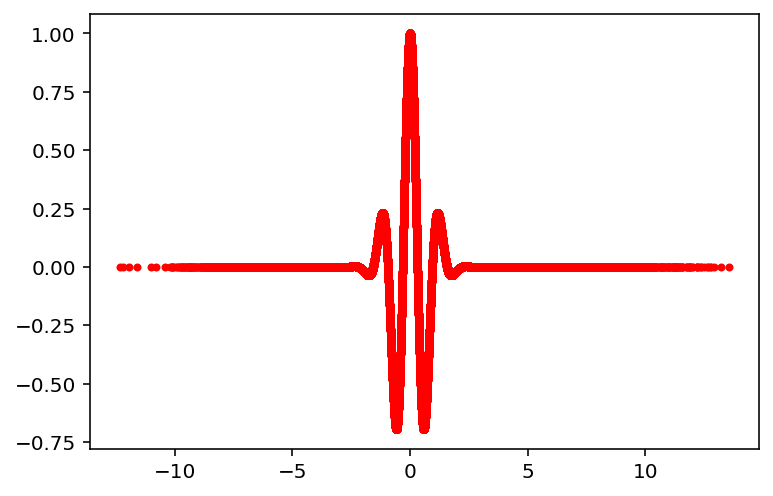

In [3]:
# 1D line
x = 3 * np.random.randn(100000, 1) + 1
y = np.exp(-(x**2))*np.cos(5*x)
plt.plot(x[:, 0], y[:, 0], 'r.')
X = torch.Tensor(x).to(device)
Y = torch.Tensor(y).to(device)
print("Preparing dataset done!")

# Define Model

In [4]:
# our model
class Model(nn.Module):
    def __init__(self, input_channel=1, hidden_size=128, output_channel=1, init_weight="he", init_bias="zero"):
        super(Model, self).__init__()

        self.init_weight = init_weight
        self.init_bias = init_bias

        self.linear1 = nn.Linear(input_channel, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_channel)

        self.init_params()

    def init_params(self):
        
        init_weight_method = {
        "he": nn.init.kaiming_normal_, 
        "xavier": nn.init.xavier_normal_
        }
        assert self.init_weight in init_weight_method.keys(), f'Select the weight initialization method in {list(init_weight_method.keys())}'
        
        init_bias_method = {
            "zero": nn.init.zeros_, 
            "uniform": nn.init.uniform_
        }
        assert self.init_bias in init_bias_method.keys(), f'Select the bias initialization method in {list(init_bias_method.keys())}'

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init_weight_method[self.init_weight](m.weight)
                init_bias_method[self.init_bias](m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
                
    def forward(self, X):
        X = F.relu((self.linear1(X)))
        X = F.relu((self.linear2(X)))
        X = self.linear3(X)
        return X

# Set Three Model

In [5]:
model_sgd = Model(init_weight='xavier').to(device)
sgd = optim.SGD(model_sgd.parameters(), lr=LEARNING_RATE)

model_momentum = Model(init_weight='xavier').to(device)
momentum = optim.SGD(model_momentum.parameters(), lr=LEARNING_RATE, momentum=0.9)

model_adam = Model(init_weight='xavier').to(device)
adam = optim.Adam(model_adam.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()

# Calculate Parameters

In [6]:
def count_total_params(model):
    total_params = 0
    for param_name, param in model.named_parameters():
        if param.requires_grad:
            total_params += len(param.reshape(-1))
    print(f"Number of Total Parameters: {total_params:,d}")    

count_total_params(model_sgd)
count_total_params(model_momentum)
count_total_params(model_adam)

Number of Total Parameters: 16,897
Number of Total Parameters: 16,897
Number of Total Parameters: 16,897


# Train Each Model 

Start training !
epoch:[1/1000] sgd cost:[0.132] momentum cost:[0.080] adam cost:[0.194]


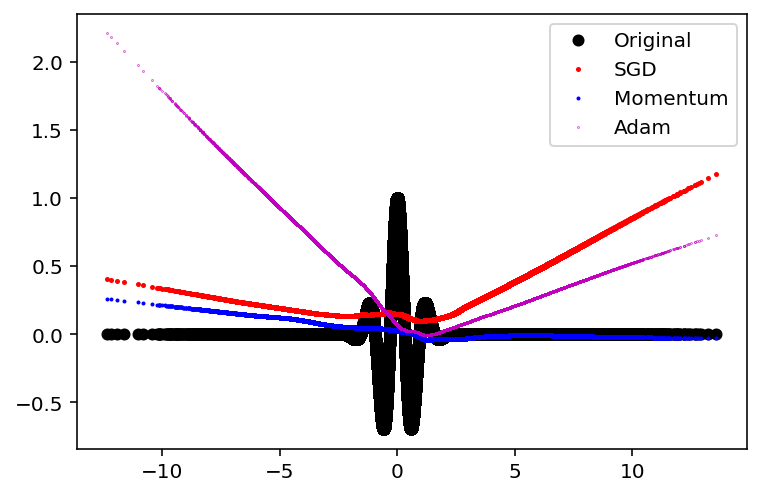

epoch:[2/1000] sgd cost:[10.560] momentum cost:[0.100] adam cost:[3529.853]
epoch:[3/1000] sgd cost:[38.303] momentum cost:[0.423] adam cost:[24.933]
epoch:[4/1000] sgd cost:[0.407] momentum cost:[23.161] adam cost:[15.556]
epoch:[5/1000] sgd cost:[0.273] momentum cost:[7.509] adam cost:[20.028]
epoch:[6/1000] sgd cost:[0.197] momentum cost:[0.753] adam cost:[18.272]
epoch:[7/1000] sgd cost:[0.147] momentum cost:[0.757] adam cost:[13.661]
epoch:[8/1000] sgd cost:[0.116] momentum cost:[0.525] adam cost:[6.502]
epoch:[9/1000] sgd cost:[0.099] momentum cost:[0.258] adam cost:[0.498]
epoch:[10/1000] sgd cost:[0.092] momentum cost:[0.270] adam cost:[4.701]
epoch:[11/1000] sgd cost:[0.089] momentum cost:[0.093] adam cost:[3.437]
epoch:[12/1000] sgd cost:[0.086] momentum cost:[0.142] adam cost:[0.703]
epoch:[13/1000] sgd cost:[0.085] momentum cost:[0.116] adam cost:[0.150]
epoch:[14/1000] sgd cost:[0.084] momentum cost:[0.095] adam cost:[0.816]
epoch:[15/1000] sgd cost:[0.083] momentum cost:[

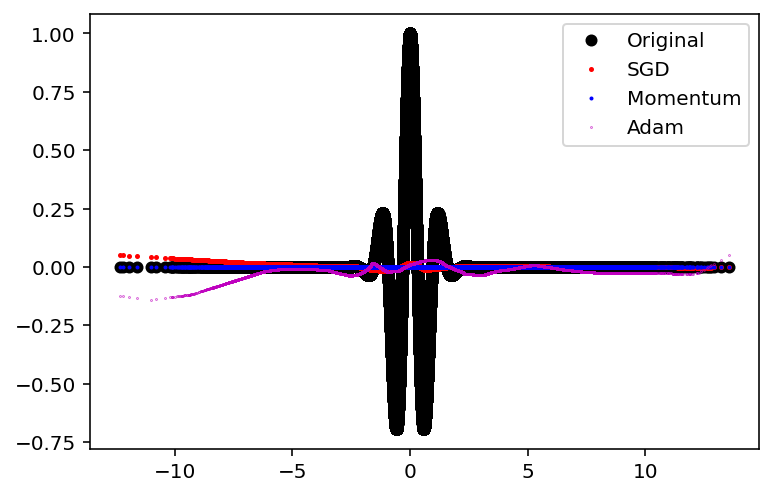

epoch:[102/1000] sgd cost:[0.076] momentum cost:[0.078] adam cost:[0.078]
epoch:[103/1000] sgd cost:[0.076] momentum cost:[0.078] adam cost:[0.078]
epoch:[104/1000] sgd cost:[0.076] momentum cost:[0.079] adam cost:[0.078]
epoch:[105/1000] sgd cost:[0.076] momentum cost:[0.079] adam cost:[0.078]
epoch:[106/1000] sgd cost:[0.076] momentum cost:[0.078] adam cost:[0.078]
epoch:[107/1000] sgd cost:[0.076] momentum cost:[0.078] adam cost:[0.078]
epoch:[108/1000] sgd cost:[0.076] momentum cost:[0.078] adam cost:[0.077]
epoch:[109/1000] sgd cost:[0.076] momentum cost:[0.078] adam cost:[0.077]
epoch:[110/1000] sgd cost:[0.076] momentum cost:[0.078] adam cost:[0.077]
epoch:[111/1000] sgd cost:[0.076] momentum cost:[0.078] adam cost:[0.077]
epoch:[112/1000] sgd cost:[0.076] momentum cost:[0.078] adam cost:[0.077]
epoch:[113/1000] sgd cost:[0.076] momentum cost:[0.078] adam cost:[0.077]
epoch:[114/1000] sgd cost:[0.076] momentum cost:[0.078] adam cost:[0.077]
epoch:[115/1000] sgd cost:[0.076] mome

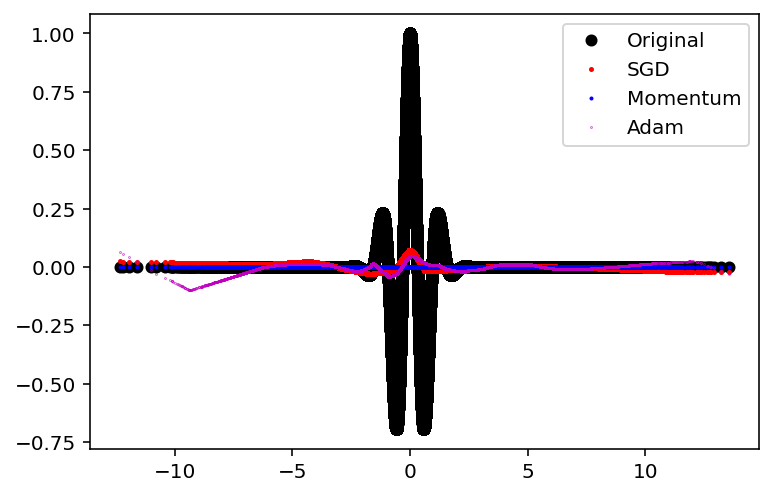

epoch:[202/1000] sgd cost:[0.073] momentum cost:[0.078] adam cost:[0.074]
epoch:[203/1000] sgd cost:[0.073] momentum cost:[0.078] adam cost:[0.074]
epoch:[204/1000] sgd cost:[0.073] momentum cost:[0.078] adam cost:[0.074]
epoch:[205/1000] sgd cost:[0.073] momentum cost:[0.078] adam cost:[0.074]
epoch:[206/1000] sgd cost:[0.072] momentum cost:[0.078] adam cost:[0.074]
epoch:[207/1000] sgd cost:[0.072] momentum cost:[0.078] adam cost:[0.074]
epoch:[208/1000] sgd cost:[0.072] momentum cost:[0.078] adam cost:[0.074]
epoch:[209/1000] sgd cost:[0.072] momentum cost:[0.078] adam cost:[0.074]
epoch:[210/1000] sgd cost:[0.072] momentum cost:[0.078] adam cost:[0.074]
epoch:[211/1000] sgd cost:[0.072] momentum cost:[0.078] adam cost:[0.074]
epoch:[212/1000] sgd cost:[0.072] momentum cost:[0.078] adam cost:[0.074]
epoch:[213/1000] sgd cost:[0.072] momentum cost:[0.078] adam cost:[0.074]
epoch:[214/1000] sgd cost:[0.072] momentum cost:[0.078] adam cost:[0.073]
epoch:[215/1000] sgd cost:[0.072] mome

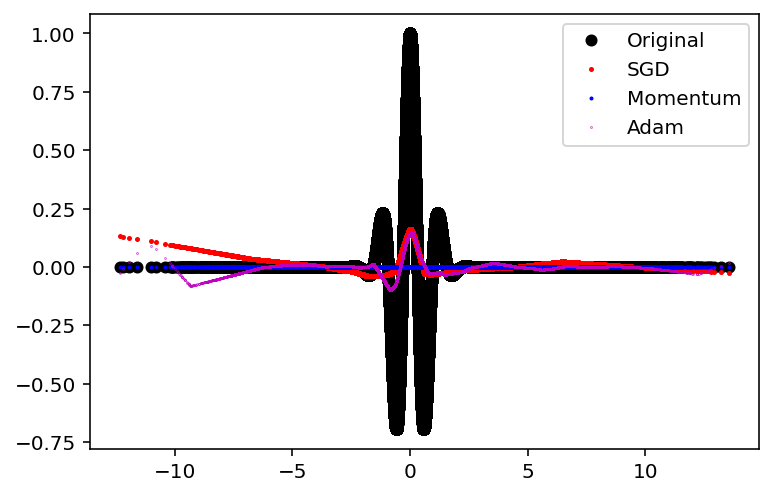

epoch:[302/1000] sgd cost:[0.067] momentum cost:[0.078] adam cost:[0.065]
epoch:[303/1000] sgd cost:[0.067] momentum cost:[0.078] adam cost:[0.065]
epoch:[304/1000] sgd cost:[0.066] momentum cost:[0.078] adam cost:[0.065]
epoch:[305/1000] sgd cost:[0.066] momentum cost:[0.078] adam cost:[0.065]
epoch:[306/1000] sgd cost:[0.066] momentum cost:[0.078] adam cost:[0.065]
epoch:[307/1000] sgd cost:[0.066] momentum cost:[0.078] adam cost:[0.065]
epoch:[308/1000] sgd cost:[0.066] momentum cost:[0.078] adam cost:[0.064]
epoch:[309/1000] sgd cost:[0.066] momentum cost:[0.078] adam cost:[0.064]
epoch:[310/1000] sgd cost:[0.066] momentum cost:[0.078] adam cost:[0.064]
epoch:[311/1000] sgd cost:[0.066] momentum cost:[0.078] adam cost:[0.064]
epoch:[312/1000] sgd cost:[0.066] momentum cost:[0.078] adam cost:[0.064]
epoch:[313/1000] sgd cost:[0.066] momentum cost:[0.078] adam cost:[0.064]
epoch:[314/1000] sgd cost:[0.066] momentum cost:[0.078] adam cost:[0.063]
epoch:[315/1000] sgd cost:[0.066] mome

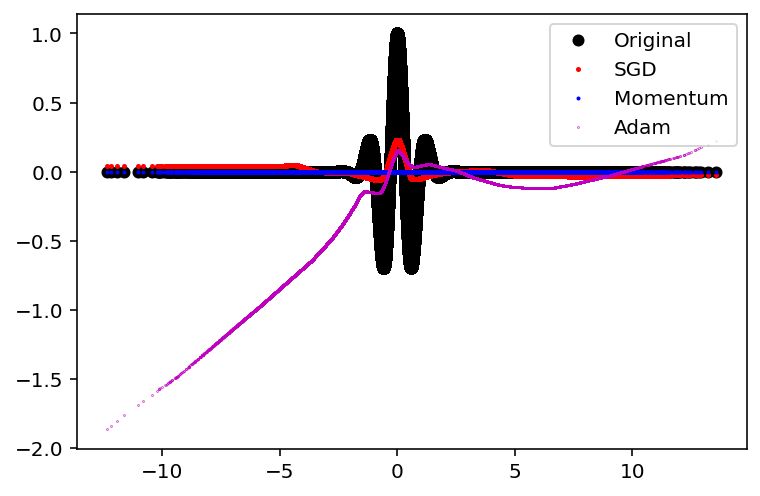

epoch:[402/1000] sgd cost:[0.060] momentum cost:[0.078] adam cost:[0.121]
epoch:[403/1000] sgd cost:[0.060] momentum cost:[0.078] adam cost:[0.079]
epoch:[404/1000] sgd cost:[0.059] momentum cost:[0.078] adam cost:[0.089]
epoch:[405/1000] sgd cost:[0.059] momentum cost:[0.078] adam cost:[0.118]
epoch:[406/1000] sgd cost:[0.059] momentum cost:[0.078] adam cost:[0.111]
epoch:[407/1000] sgd cost:[0.059] momentum cost:[0.078] adam cost:[0.085]
epoch:[408/1000] sgd cost:[0.059] momentum cost:[0.078] adam cost:[0.082]
epoch:[409/1000] sgd cost:[0.059] momentum cost:[0.078] adam cost:[0.099]
epoch:[410/1000] sgd cost:[0.059] momentum cost:[0.078] adam cost:[0.102]
epoch:[411/1000] sgd cost:[0.059] momentum cost:[0.078] adam cost:[0.088]
epoch:[412/1000] sgd cost:[0.058] momentum cost:[0.078] adam cost:[0.078]
epoch:[413/1000] sgd cost:[0.058] momentum cost:[0.078] adam cost:[0.082]
epoch:[414/1000] sgd cost:[0.058] momentum cost:[0.078] adam cost:[0.090]
epoch:[415/1000] sgd cost:[0.058] mome

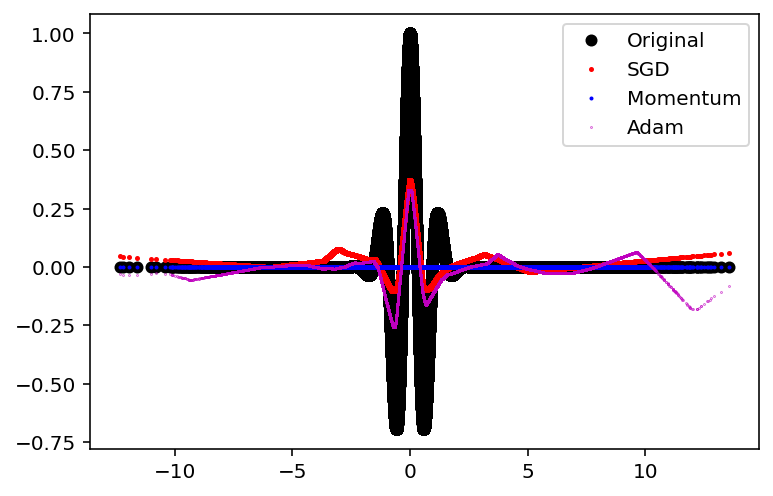

epoch:[502/1000] sgd cost:[0.049] momentum cost:[0.078] adam cost:[0.045]
epoch:[503/1000] sgd cost:[0.049] momentum cost:[0.078] adam cost:[0.044]
epoch:[504/1000] sgd cost:[0.049] momentum cost:[0.078] adam cost:[0.044]
epoch:[505/1000] sgd cost:[0.049] momentum cost:[0.078] adam cost:[0.044]
epoch:[506/1000] sgd cost:[0.049] momentum cost:[0.078] adam cost:[0.043]
epoch:[507/1000] sgd cost:[0.048] momentum cost:[0.078] adam cost:[0.043]
epoch:[508/1000] sgd cost:[0.048] momentum cost:[0.078] adam cost:[0.043]
epoch:[509/1000] sgd cost:[0.048] momentum cost:[0.078] adam cost:[0.043]
epoch:[510/1000] sgd cost:[0.048] momentum cost:[0.078] adam cost:[0.042]
epoch:[511/1000] sgd cost:[0.048] momentum cost:[0.078] adam cost:[0.042]
epoch:[512/1000] sgd cost:[0.048] momentum cost:[0.078] adam cost:[0.042]
epoch:[513/1000] sgd cost:[0.048] momentum cost:[0.078] adam cost:[0.042]
epoch:[514/1000] sgd cost:[0.048] momentum cost:[0.078] adam cost:[0.041]
epoch:[515/1000] sgd cost:[0.048] mome

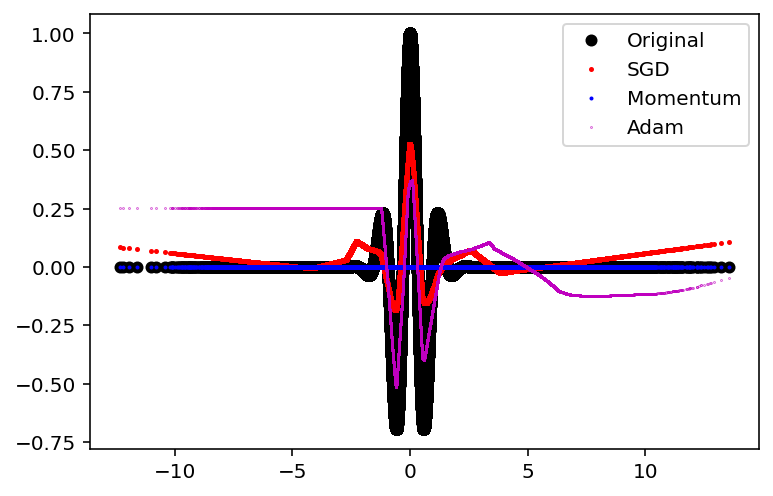

epoch:[602/1000] sgd cost:[0.037] momentum cost:[0.078] adam cost:[0.042]
epoch:[603/1000] sgd cost:[0.037] momentum cost:[0.078] adam cost:[0.043]
epoch:[604/1000] sgd cost:[0.037] momentum cost:[0.078] adam cost:[0.044]
epoch:[605/1000] sgd cost:[0.037] momentum cost:[0.078] adam cost:[0.044]
epoch:[606/1000] sgd cost:[0.037] momentum cost:[0.078] adam cost:[0.044]
epoch:[607/1000] sgd cost:[0.036] momentum cost:[0.078] adam cost:[0.042]
epoch:[608/1000] sgd cost:[0.036] momentum cost:[0.078] adam cost:[0.041]
epoch:[609/1000] sgd cost:[0.036] momentum cost:[0.078] adam cost:[0.041]
epoch:[610/1000] sgd cost:[0.036] momentum cost:[0.078] adam cost:[0.041]
epoch:[611/1000] sgd cost:[0.036] momentum cost:[0.078] adam cost:[0.042]
epoch:[612/1000] sgd cost:[0.036] momentum cost:[0.078] adam cost:[0.041]
epoch:[613/1000] sgd cost:[0.036] momentum cost:[0.078] adam cost:[0.040]
epoch:[614/1000] sgd cost:[0.036] momentum cost:[0.078] adam cost:[0.040]
epoch:[615/1000] sgd cost:[0.035] mome

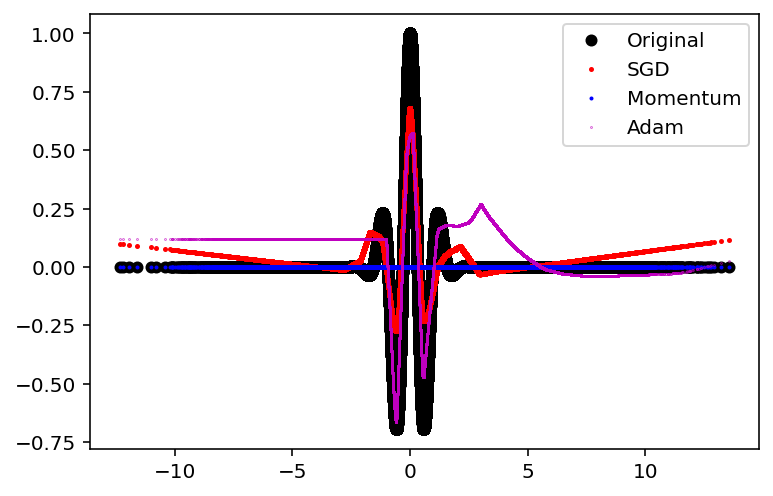

epoch:[702/1000] sgd cost:[0.026] momentum cost:[0.078] adam cost:[0.018]
epoch:[703/1000] sgd cost:[0.026] momentum cost:[0.078] adam cost:[0.027]
epoch:[704/1000] sgd cost:[0.026] momentum cost:[0.078] adam cost:[0.020]
epoch:[705/1000] sgd cost:[0.025] momentum cost:[0.078] adam cost:[0.028]
epoch:[706/1000] sgd cost:[0.025] momentum cost:[0.078] adam cost:[0.018]
epoch:[707/1000] sgd cost:[0.025] momentum cost:[0.078] adam cost:[0.024]
epoch:[708/1000] sgd cost:[0.025] momentum cost:[0.078] adam cost:[0.017]
epoch:[709/1000] sgd cost:[0.025] momentum cost:[0.078] adam cost:[0.019]
epoch:[710/1000] sgd cost:[0.025] momentum cost:[0.078] adam cost:[0.020]
epoch:[711/1000] sgd cost:[0.025] momentum cost:[0.078] adam cost:[0.014]
epoch:[712/1000] sgd cost:[0.025] momentum cost:[0.078] adam cost:[0.021]
epoch:[713/1000] sgd cost:[0.024] momentum cost:[0.078] adam cost:[0.014]
epoch:[714/1000] sgd cost:[0.024] momentum cost:[0.078] adam cost:[0.018]
epoch:[715/1000] sgd cost:[0.024] mome

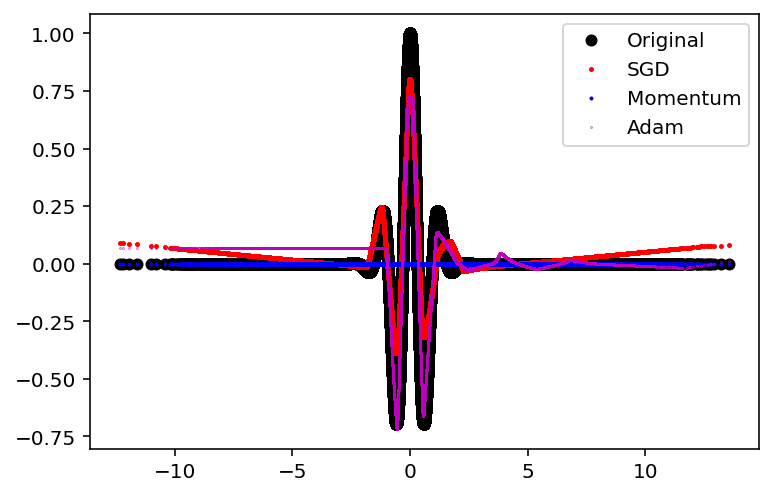

epoch:[802/1000] sgd cost:[0.016] momentum cost:[0.078] adam cost:[0.005]
epoch:[803/1000] sgd cost:[0.015] momentum cost:[0.078] adam cost:[0.005]
epoch:[804/1000] sgd cost:[0.015] momentum cost:[0.078] adam cost:[0.005]
epoch:[805/1000] sgd cost:[0.015] momentum cost:[0.078] adam cost:[0.005]
epoch:[806/1000] sgd cost:[0.015] momentum cost:[0.078] adam cost:[0.005]
epoch:[807/1000] sgd cost:[0.015] momentum cost:[0.078] adam cost:[0.005]
epoch:[808/1000] sgd cost:[0.015] momentum cost:[0.078] adam cost:[0.005]
epoch:[809/1000] sgd cost:[0.015] momentum cost:[0.078] adam cost:[0.005]
epoch:[810/1000] sgd cost:[0.015] momentum cost:[0.078] adam cost:[0.005]
epoch:[811/1000] sgd cost:[0.015] momentum cost:[0.078] adam cost:[0.005]
epoch:[812/1000] sgd cost:[0.014] momentum cost:[0.078] adam cost:[0.005]
epoch:[813/1000] sgd cost:[0.014] momentum cost:[0.078] adam cost:[0.005]
epoch:[814/1000] sgd cost:[0.014] momentum cost:[0.078] adam cost:[0.005]
epoch:[815/1000] sgd cost:[0.014] mome

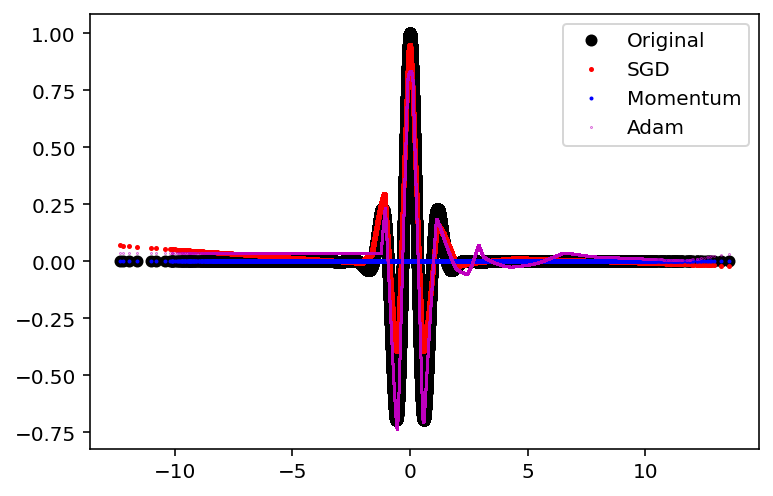

epoch:[902/1000] sgd cost:[0.013] momentum cost:[0.078] adam cost:[0.003]
epoch:[903/1000] sgd cost:[0.012] momentum cost:[0.078] adam cost:[0.002]
epoch:[904/1000] sgd cost:[0.013] momentum cost:[0.078] adam cost:[0.002]
epoch:[905/1000] sgd cost:[0.012] momentum cost:[0.078] adam cost:[0.002]
epoch:[906/1000] sgd cost:[0.013] momentum cost:[0.078] adam cost:[0.002]
epoch:[907/1000] sgd cost:[0.012] momentum cost:[0.078] adam cost:[0.002]
epoch:[908/1000] sgd cost:[0.013] momentum cost:[0.078] adam cost:[0.002]
epoch:[909/1000] sgd cost:[0.012] momentum cost:[0.078] adam cost:[0.002]
epoch:[910/1000] sgd cost:[0.013] momentum cost:[0.078] adam cost:[0.002]
epoch:[911/1000] sgd cost:[0.012] momentum cost:[0.078] adam cost:[0.002]
epoch:[912/1000] sgd cost:[0.012] momentum cost:[0.078] adam cost:[0.002]
epoch:[913/1000] sgd cost:[0.012] momentum cost:[0.078] adam cost:[0.002]
epoch:[914/1000] sgd cost:[0.012] momentum cost:[0.078] adam cost:[0.002]
epoch:[915/1000] sgd cost:[0.012] mome

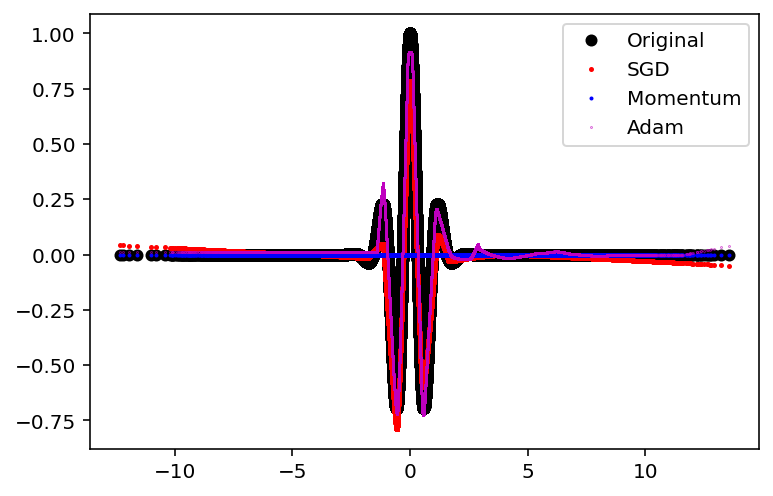

Training Done !


In [7]:
# Training Phase
plot_every = 100
print("Start training !")

# Training loop
for epoch in range(EPOCHS):
    
    # SGD model
    y_pred_sgd = model_sgd.forward(X)
    loss_sgd = criterion(y_pred_sgd, Y)

    sgd.zero_grad()
    loss_sgd.backward()
    sgd.step()

    # Momentum model
    y_pred_momentum = model_momentum.forward(X)
    loss_momentum = criterion(y_pred_momentum, Y)

    momentum.zero_grad()
    loss_momentum.backward()
    momentum.step()
        
    # Adam model
    y_pred_adam = model_adam.forward(X)
    loss_adam = criterion(y_pred_adam, Y)

    adam.zero_grad()
    loss_adam.backward()
    adam.step()
        
    print(f"epoch:[{epoch+1}/{EPOCHS}] sgd cost:[{loss_sgd:.3f}] momentum cost:[{loss_momentum:.3f}] adam cost:[{loss_adam:.3f}]")
    
    if epoch % plot_every == 0 :
        plt.plot(x, y, 'k.', markersize=10)
        plt.plot(X.cpu().detach().numpy(), y_pred_sgd.cpu().detach().numpy(), 'r.', markersize=3)
        plt.plot(X.cpu().detach().numpy(), y_pred_momentum.cpu().detach().numpy(), 'b.', markersize=2)
        plt.plot(X.cpu().detach().numpy(), y_pred_adam.cpu().detach().numpy(), 'm.', markersize=0.5)
        plt.legend(["Original", "SGD", "Momentum", "Adam"], loc="upper right")
        plt.show()

plt.plot(x, y, 'k.', markersize=10)
plt.plot(X.cpu().detach().numpy(), y_pred_sgd.cpu().detach().numpy(), 'r.', markersize=3)
plt.plot(X.cpu().detach().numpy(), y_pred_momentum.cpu().detach().numpy(), 'b.', markersize=2)
plt.plot(X.cpu().detach().numpy(), y_pred_adam.cpu().detach().numpy(), 'm.', markersize=0.5)
plt.legend(["Original", "SGD", "Momentum", "Adam"], loc="upper right")
plt.show()
print("Training Done !")

